In [1]:
import os
import cv2
import numpy as np

from sklearn.cluster import KMeans, DBSCAN

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

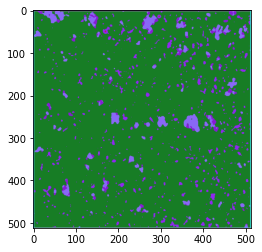

In [55]:
image = np.array(Image.open("./output.png"))
output = image.copy()
plt.imshow(image)

In [60]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
image_stats = cv2.connectedComponentsWithStats(binary, 8, cv2.CV_32S)

num_labels,labels,stats, _ = image_stats

for i in range(0, num_labels):
    #extract the individual parameters 
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]
    
    print(x, y, w, h, area)
    
    mask = (labels == i).astype("uint8") * 255
    
    cv2.imshow("Output", output)
    cv2.imshow("Component", mask)
    
    k= cv2.waitKey(0)
    if k == ord("q"):
        break
cv2.destroyAllWindows()

0 0 512 512 13215
0 0 511 2 1021
3 3 507 508 247889
37 10 3 4 10
133 17 2 2 4
371 255 3 2 5
